In [18]:
from sklearn import ensemble, cross_validation, learning_curve, metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Случайный лес

In [3]:
bioresponce = pd.read_csv('bioresponce.csv', header=0, sep=',')

In [4]:
bioresponce.head()

Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...    D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...        0      0      0      0      0      0      0   
1  0.411754  0.836582  ...        1      1      1      1      0      1      0   
2  0.517720  0.679051  ...        0      0      0      0      0      0      0   
3  0.288764  0.805110  ...        0      0      0      0      0      0      0   
4  0.303809  0.812646  ...        0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  

[5 rows x 1777 columns]

В первом столбце - целевая переменная (был ли дан биологический ответ или нет), остальное - признаки.

In [5]:
# Отрежем целевую переменную (так удобнее будет работать с данными)
bioresponce_target = bioresponce.Activity.values

In [10]:
# Посмотрим на баланс классов

bio_answer = sum(bioresponce_target) / float(len(bioresponce_target))
no_bio_answer = 1.0 - bio_answer

print('bioresponse = 1: {:.2f}\nbioresponse = 0: {:.2f}'.format(bio_answer, no_bio_answer))

bioresponse = 1: 0.54
bioresponse = 0: 0.46


In [11]:
# Отдельно отрежем данные
bioresponce_data = bioresponce.iloc[:, 1:]

In [12]:
# Будем строить модель с 50 деревьями с глубиной не больше двух
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)

In [15]:
# Интересно посмотреть, как меняется качество на обучающей выборке в зависимости от того,
# на скольких объектах мы обучаемся


# На вход подаём, на каких долях обучающей выборки мы хотим строить модель. 
# Будут возвращены размеры обучающей выборки и оценки качества на train'e/test'e
# Сначала возбмём 0,1 от обучающей выборки, а затем будем двигаться с шагом 0,2 до 1. 

train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier_low_depth, bioresponce_data, bioresponce_target,
                                                                       train_sizes = np.arange(0.1, 1., 0.2),
                                                                       cv=3, scoring='accuracy')

In [16]:
print(train_sizes) # Размеры обучающей выборки в рамках эксперимента
# Смотрим качество верного прогноза на обучающей и тестовой выборках
print(train_scores.mean(axis=1)) # делаем усреднение по всем фолдам кросс-валидации; axis=1 --> усредняем по строчкам
print(test_scores.mean(axis=1))

[ 250  750 1250 1750 2250]
[ 0.74933333  0.71333333  0.68453333  0.69104762  0.69022222]
[ 0.62356685  0.64195598  0.65369955  0.66248974  0.66728527]


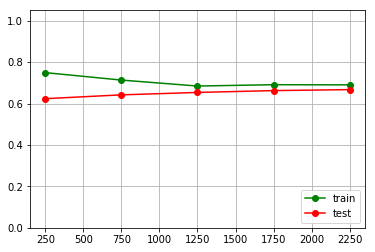

In [21]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')
plt.show()

Вывод по графику - дальнейший рост обучающей выборке навряд ли скажется на качестве нашей модели.

Попробуем увеличить сложность модели.       
Для этого увеличим глубину деревьев до максимума *(максимальная глубина деревьев=10)*       

In [22]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [23]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier, bioresponce_data, bioresponce_target,
                                                                       train_sizes = np.arange(0.1, 1., 0.2),
                                                                       cv=3, scoring='accuracy')

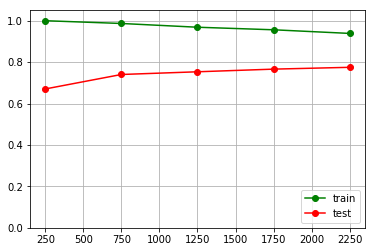

In [24]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')
plt.show()

Здесь с ростом обучающей выборки качество на тесте продолжает расти.       
Качество на обучающей выборке продолжает падать.        

В данном случае имеет смысл увеличивать объем обучающей выборки.